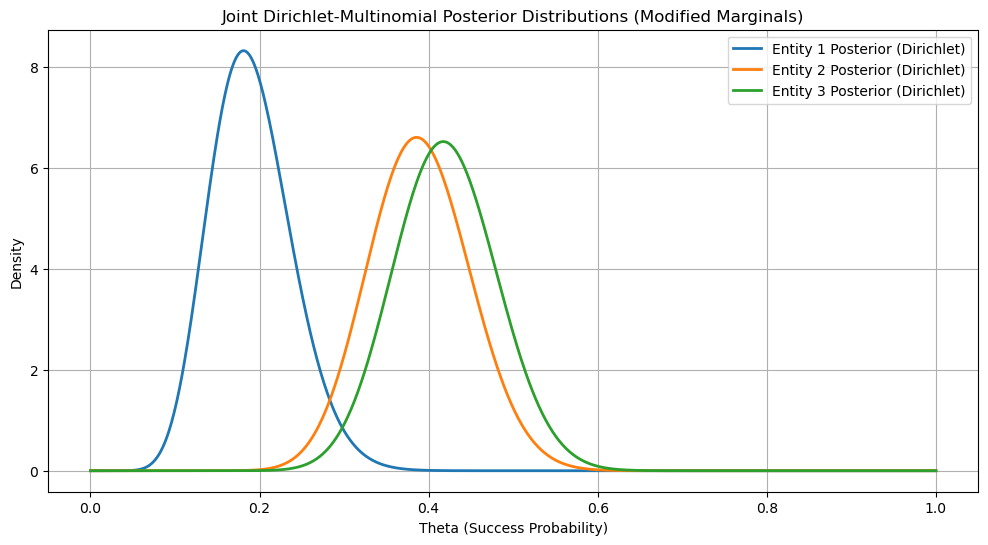

In [1]:
import numpy as np
from scipy.stats import dirichlet, beta
import matplotlib.pyplot as plt

# Define the number of entities
num_entities = 3 
num_trials = 40  

# Initialize Dirichlet prior (uniform prior)
dirichlet_prior = np.ones(num_entities) * 1.5  

# Simulated data: success counts for each entity
np.random.seed(456)  # Changed random seed for different data
true_thetas = [0.35, 0.55, 0.75]  
data = [np.random.binomial(1, theta, num_trials) for theta in true_thetas]
success_counts = [np.sum(entity_data) for entity_data in data]

# Update Dirichlet posterior
dirichlet_posterior = dirichlet_prior + success_counts

# Plot Dirichlet posterior (marginals for visualization)
plt.figure(figsize=(12, 6))
x = np.linspace(0, 1, 1000)  # Range for theta values
for i in range(num_entities):
    y = beta.pdf(x, dirichlet_posterior[i], np.sum(dirichlet_posterior) - dirichlet_posterior[i])
    plt.plot(x, y, label=f"Entity {i+1} Posterior (Dirichlet)", linewidth=2)
plt.title("Joint Dirichlet-Multinomial Posterior Distributions (Modified Marginals)")
plt.xlabel("Theta (Success Probability)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


